<a href="https://colab.research.google.com/github/Pusse-01/ID-Card-verification/blob/main/CNN_AI_CORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install keras-tuner


     |████████████████████████████████| 97 kB 3.7 MB/s 


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import tensorflow as tf
import keras
import keras_tuner
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [7]:
img = image.load_img("/content/drive/MyDrive/CNN Model/images/training/old_front/Myf - Shyamini Rajika.jpg")

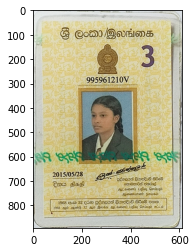

In [8]:
plt.imshow(img)

In [9]:
cv2.imread("/content/drive/MyDrive/CNN Model/images/training/old_front/Myf - Shyamini Rajika.jpg").shape

(892, 609, 3)

In [10]:
training = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [11]:
train_dataset = training.flow_from_directory('/content/drive/MyDrive/CNN Model/images/training/',
                                    target_size=(200,200),
                                    batch_size = 3,
                                    class_mode = 'sparse')

validation_dataset = training.flow_from_directory('/content/drive/MyDrive/CNN Model/images/validation/',
                                    target_size=(200,200),
                                    batch_size = 3,
                                    class_mode = 'sparse')
test_dataset = training.flow_from_directory('/content/drive/MyDrive/CNN Model/images/testing',
                                    target_size=(200,200),
                                    batch_size = 3,
                                    class_mode = 'sparse')

Found 95 images belonging to 4 classes.
Found 18 images belonging to 4 classes.
Found 23 images belonging to 4 classes.


In [12]:
target_names = []

for key in train_dataset.class_indices:

    target_names.append(key)

In [13]:
#model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                   #tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   ## tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                   #tf.keras.layers.MaxPool2D(2,2),
                                   #
                                    #tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                  # tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   #tf.keras.layers.Conv2D(16,(3,3),activation = 'relu'),
                                   #tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                  # tf.keras.layers.Flatten(),
                                   ##
                                  # tf.keras.layers.Dense(512,activation='relu'),
                                   ##
                                  # tf.keras.layers.Dense(1,activation='softmax'),
                                   #])


def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(200,200,3)
    ),
    keras.layers.MaxPool2D(2,2),
    #
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.MaxPool2D(2,2),
    #
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    #keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(4,activation='softmax'),
  ])
  
  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [14]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [15]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,
                         )

In [16]:
tuner_search.search(train_dataset,epochs=5,validation_data=validation_dataset)
best_model = tuner_search.get_best_models()[0]

Trial 5 Complete [00h 01m 19s]
val_accuracy: 0.6666666865348816

Best val_accuracy So Far: 0.7777777910232544
Total elapsed time: 00h 08m 30s
INFO:tensorflow:Oracle triggered exit


In [17]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 196, 196, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 94, 94, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 141376)            0         
_________________________________________________________________
dense (Dense)                (None, 80)                11310160  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 3

In [18]:
model_fit = best_model.fit(train_dataset,
                     steps_per_epoch=10,
                     epochs=40,
                     validation_data=validation_dataset)

Epoch 1/40
10/10 [==============================] - 7s 625ms/step - loss: 0.8988 - accuracy: 0.7667 - val_loss: 0.8613 - val_accuracy: 0.7222
Epoch 2/40
10/10 [==============================] - 6s 582ms/step - loss: 0.6098 - accuracy: 0.8276 - val_loss: 1.2179 - val_accuracy: 0.7222
Epoch 3/40
10/10 [==============================] - 5s 549ms/step - loss: 0.4402 - accuracy: 0.8667 - val_loss: 0.5823 - val_accuracy: 0.8333
Epoch 4/40
10/10 [==============================] - 5s 578ms/step - loss: 0.5099 - accuracy: 0.8667 - val_loss: 0.7614 - val_accuracy: 0.8333
Epoch 5/40
10/10 [==============================] - 5s 557ms/step - loss: 0.2017 - accuracy: 0.9333 - val_loss: 0.6164 - val_accuracy: 0.8333
Epoch 6/40
10/10 [==============================] - 5s 524ms/step - loss: 0.5899 - accuracy: 0.8000 - val_loss: 0.5575 - val_accuracy: 0.8333
Epoch 7/40
10/10 [==============================] - 6s 563ms/step - loss: 0.5399 - accuracy: 0.7667 - val_loss: 0.5944 - val_accuracy: 0.8889
Epoch 

Confusion Matrix

In [19]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [20]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))


    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()


    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)


    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
Normalized confusion matrix


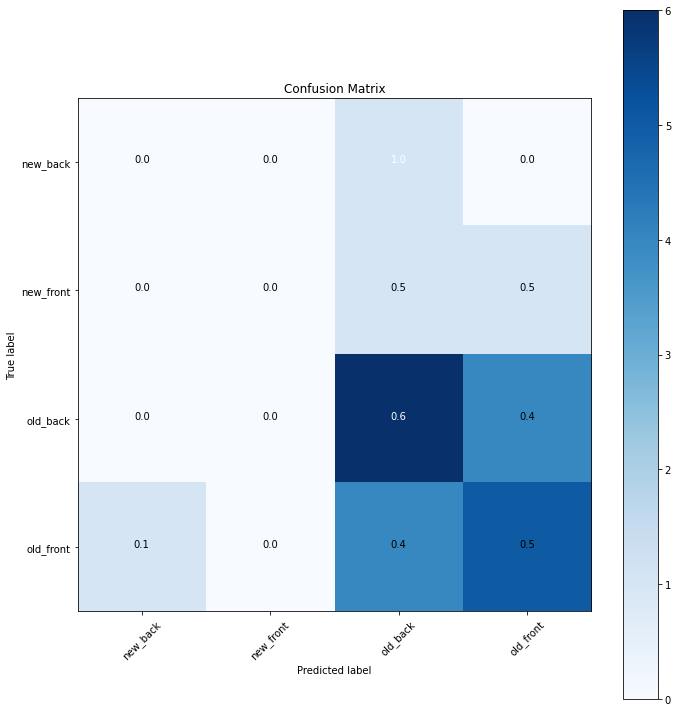

In [21]:
Y_pred = best_model.predict_generator(test_dataset)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(test_dataset.classes, y_pred)

plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

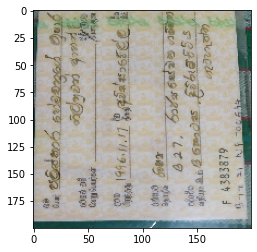

Old Back


In [22]:
img = image.load_img("/content/drive/MyDrive/CNN Model/images/testing/old_back/old_back_5.jpg",
                    target_size=(200,200))
plt.imshow(img)
plt.show()
    
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images = np.vstack([x])
val= np.argmax(best_model.predict(images))

if val == 0:
    print("New Back")
elif val == 1:
    print("New Front")
elif val == 2:
    print("Old Back")
else :
    print("Old Front")

Save and load

In [23]:
pip install pyyaml h5py  # Required to save models in HDF5 format


In [24]:
best_model.save('/content/drive/MyDrive/CNN Model.h5')

In [25]:
from tensorflow.keras.models import load_model
new_model = load_model('/content/drive/MyDrive/CNN Model.h5')

In [26]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 196, 196, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 94, 94, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 141376)            0         
_________________________________________________________________
dense (Dense)                (None, 80)                11310160  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 3

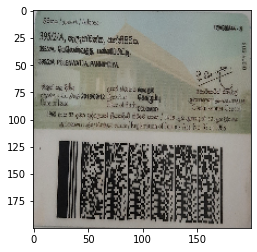

0
new back


In [35]:
img = image.load_img("/content/drive/MyDrive/CNN Model/images/testing/new_back/20210819_203036 - Esha Keshari.jpg",
                    target_size=(200,200))
plt.imshow(img)
plt.show()
    
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images = np.vstack([x])
val= val= np.argmax(best_model.predict(images))
print (val)
if val == 0:
    print("new back")
elif val == 1:
    print("new front")
elif val == 2:
    print("old back")
else :
    print("old front")

8/8 - 2s - loss: 0.4393 - accuracy: 0.9130


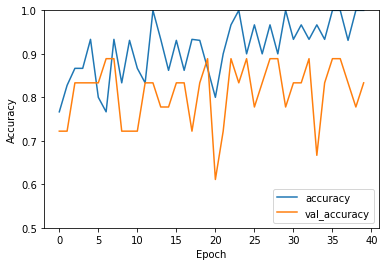

In [28]:
plt.plot(model_fit.history['accuracy'], label='accuracy')
plt.plot(model_fit.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = best_model.evaluate(test_dataset, verbose=2)


In [29]:
!pip install tensorflowjs

In [30]:
import tensorflowjs as tfjs
from keras.models import model_from_json

In [36]:
tfjs.converters.save_keras_model(best_model,'/content/drive/MyDrive/CNN Model/loading')